Author: Yavuz Selim Vurgun



### In this notebook, we are building an SVM classifier for the MNIST Dataset. We are also using cross validation, RandomizedSearchCV and GridSearchCV to optimize the performance by changing parameters.

Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# For cross validation and splitting the data
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
# To import the dataset
from sklearn.datasets import fetch_openml
# Support Vector Machine Classifier
from sklearn.svm import SVC
# For evaluating the model performance
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# For making a good looking table to compare our models
from tabulate import tabulate

Importing the dataset using sklearn

In [ ]:
# Importing the dataset using scikit-learn's fetch_openml function
data = fetch_openml("mnist_784", version=1, as_frame=False)
X, y = data.data, data.target

Here we set the X value to be the multi-dimensional array which is representing all the images of our dataset, each containing 784 values of numbers from 0 to 255, representing the intensity of the white color in that pixel.
And y is the corresponding test set which contains labels for each of the elements in the X set. Since y has objects as its elements, we first convert all the objects to integers to operate. Both the X and y sets have a length of 70000, indicating there are 70000 images we can work with.

In [ ]:
# Viewing the features
print(X)
print(X.shape)
pd.DataFrame(X).value_counts()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(70000, 784)


0  1  2  3  4  5  6  7  8  9  10  11  12   13   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40   41   42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67   68   69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95   96   97  98  99  100  101  102  103  104  105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128  129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144  145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160  161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176  177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192  193  194  195  196  197  198  199  200  201  202  203  204  205  206  207  208  209  210  211  212  213  214  215  216  217  218  219  220  221  222  223  224  225  226  227  228  229  230  231  232  233  234  235  236  237  238  239  240  241  242  243  244  245  246  247  248  249  250  251  252  253  254  255  256  257  258  259  260  261  262  263  264  265  266  267  268  269  270  271  272  273  274  275  276  277  278  279  280  281  282  283  284  285  286  287  288  289  290  291  292  293  294  295  296  297  298  299  300  301  302  303  304  305  306  307  308  309  310  311  312  313  314  315  316  317  318  319  320  321  322  323  324  325  326  327  328  329  330  331  332  333  334  335  336  337  338  339  340  341  342  343  344  345  346  347  348  349  350  351  352  353  354  355  356  357  358  359  360  361  362  363  364  365  366  367  368  369  370  371  372  373  374  375  376  377  378  379  380  381  382  383  384  385  386  387  388  389  390  391  392  393  394  395  396  397  398  399  400  401  402  403  404  405  406  407  408  409  410  411  412  413  414  415  416  417  418  419  420  421  422  423  424  425  426  427  428  429  430  431  432  433  434  435  436  437  438  439  440  441  442  443  444  445  446  447  448  449  450  451  452  453  454  455  456  457  458  459  460  461  462  463  464  465  466  467  468  469  470  471  472  473  474  475  476  477  478  479  480  481  482  483  484  485  486  487  488  489  490  491  492  493  494  495  496  497  498  499  500  501  502  503  504  505  506  507  508  509  510  511  512  513  514  515  516  517  518  519  520  521  522  523  524  525  526  527  528  529  530  531  532  533  534  535  536  537  538  539  540  541  542  543  544  545  546  547  548  549  550  551  552  553  554  555  556  557  558  559  560  561  562  563  564  565  566  567  568  569  570  571  572  573  574  575  576  577  578  579  580  581  582  583  584  585  586  587  588  589  590  591  592  593  594  595  596  597  598  599  600  601  602  603  604  605  606  607  608  609  610  611  612  613  614  615  616  617  618  619  620  621  622  623  624  625  626  627  628  629  630  631  632  633  634  635  636  637  638  639  640  641  642  643  644  645  646  647  648  649  650  651  652  653  654  655  656  657  658  659  660  661  662  663  664  665  666  667  668  669  670  671  672  673  674  675  676  677  678  679  680  681  682  683  684  685  686  687  688  689  690  691  692  693  694  695  696  697  698  699  700  701  702  703  704  705  706  707  708  709  710  711  712  713  714  715  716  717  718  719  720  721  722  723  724  725  726  727  728  729  730  731  732  733  734  735  736  737  738  739  740  741  742  743  744  745  746  747  748  749  750  751  752  753  754  755  756  757  758  759  760  761  762  763  764  765  766  767  768  769  770  771  772  773  774  775  776  777  778  779  780  781  782  783
0  0  0  0  0  0  0  0  0  0  0   0   0    0    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0    0    0   0   0   0   0   0

In [ ]:
# Viewing the target labels
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
# Casting the label objects to integers
y = y.astype(np.int8)

In [ ]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=int8)

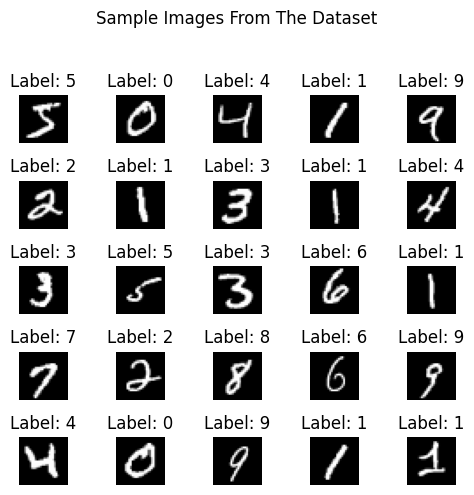

In [ ]:
# Reshaping the 784 pixel long list to a 28x28 image
X_reshaped = X.reshape(-1, 28, 28)

grid_size = 5
fig, axes = plt.subplots(grid_size, grid_size, figsize=(5,5))
fig.suptitle("Sample Images From The Dataset")

for i, ax in enumerate(axes.ravel()):
  ax.imshow(X_reshaped[i], cmap="gray")
  ax.set_title(f"Label: {y[i]}" )
  ax.axis("off")

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

**Here we split the dataset into training and test sets. Normally we would want a test set of around 30% of our original dataset, however since we are going to use poly and rbf kernels for our RandomizedSearchCV, with such a huge set it wasn't enough for the model to run for 7 hours to get a result, therefore we are using a much smaller set for this task to speed up the process. We also check if our splitted set is balanced and it looks balanced as far as we are concerned.(This can be further improved with different methods)**

In [ ]:
# Splitting the set with a 15-85 training and test set ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=42)

In [ ]:
X_train.shape

(10500, 784)

In [ ]:
y_train.shape

(10500,)

In [ ]:
pd.DataFrame(y_train).value_counts()

,count
0,
1,1216
2,1088
7,1082
3,1045
8,1044
6,1031
4,1019
0,1018
9,1001


In [ ]:
pd.Series(y).value_counts(normalize=True)

,proportion
1,0.112529
7,0.104186
3,0.102014
2,0.099857
9,0.099400
0,0.098614
6,0.098229
8,0.097500
4,0.097486
5,0.090186


Here we define our Support Vector Machine Classifier as svc, and fit it on our training set.

In [ ]:
svc = SVC()

svc.fit(X_train, y_train)

SVC()

We predict a value using the test set and compare the result to the actual value. In this case, they are both 4. So it looks okay.

In [ ]:
prediction = svc.predict([X_test[1]])
prediction

array([4], dtype=int8)

In [ ]:
y_test[1]

4

To get a better vision of the accuracy of our model, we use the cross validation score using a 5-fold Cross-Validation. Here we can view the minimum, maximum and average scores.

In [ ]:
cv_score = cross_val_score(svc, X_train, y_train, cv=5)

In [ ]:
print("Cross val scores: ", cv_score)
print("Max score: ", round(cv_score.min(), 4)*100, "%")
print("Min score: ", round(cv_score.max(), 4)*100, "%")
print("Average score: ", round(cv_score.mean(), 4)*100, "%")

Cross val scores:  [0.95142857 0.96       0.95095238 0.95857143 0.96761905]
Max score:  95.1 %
Min score:  96.76 %
Average score:  95.77 %


Now we set the parameter distributions for our RandomizedSearchCV. We have C values ranging from 0.1 to 100, gamma values of scale and auto and kernels of linear, rbf and poly.

In [ ]:
param_dist = {
    "C": [0.1, 1, 10, 100],
    "gamma": ['scale', 'auto'],
    "kernel": ['linear', 'rbf', 'poly']
}

We now start our first Randomized Search Cross-Validation with our parameter distributions as well as an iteration number of 3, and a 5-fold cross validation.

In [ ]:
randomized_search = RandomizedSearchCV(SVC(), param_dist, n_iter=3, cv=5, random_state=42, n_jobs=-1, verbose=2)
results1 = randomized_search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [ ]:
print(results1.best_estimator_)
results1.best_params_

SVC(C=1, kernel='poly')


{'kernel': 'poly', 'gamma': 'scale', 'C': 1}

In [ ]:
print("RandomizedSearchCV with n_iter=3 score:", round(results1.best_score_,4))

RandomizedSearchCV with n_iter=3 score: 0.9497


Here we increase the number of iterations to 10 without changing other parameters.

In [ ]:
randomized_search2 = RandomizedSearchCV(SVC(), param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1, verbose=2)
results2 = randomized_search2.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
print(results2.best_estimator_)
results2.best_params_

SVC(C=10)


{'kernel': 'rbf', 'gamma': 'scale', 'C': 10}

In [ ]:
print("RandomizedSearchCV with n_iter=10 score:", round(results2.best_score_,4))

RandomizedSearchCV with n_iter=10 score: 0.9641


Lastly for our RandomizedSearchCV we increment our n_iter to 15 without changing other parameters.

In [ ]:
randomized_search3 = RandomizedSearchCV(SVC(), param_dist, n_iter=15, cv=5, random_state=42, n_jobs=-1, verbose=2)
results3 = randomized_search3.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


In [ ]:
print(results3.best_estimator_)
results3.best_params_

SVC(C=10)


{'kernel': 'rbf', 'gamma': 'scale', 'C': 10}

In [ ]:
print("RandomizedSearchCV with n_iter=15 score:", round(results3.best_score_,4))

RandomizedSearchCV with n_iter=15 score: 0.9641


These RandomizedSearchCV best estimators suggest that an SVC with C=10 is the best option for us. That means we can most likely fix the value C=10 for our GridSearchCV and try fitting for the kernel and gamma values.

In [ ]:
param_grid_gsv = {
    "C": [10],
    "gamma": ['scale', 'auto'],
    "kernel": ['linear', 'rbf', 'poly']
}

In [ ]:
grid_search = GridSearchCV(SVC(), param_grid_gsv, cv=5, n_jobs=-1, verbose=2)
grid_results = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [ ]:
print(grid_results.best_estimator_)
print(grid_results.best_params_)

SVC(C=10)
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
print("GridSearchCV score:", round(grid_results.best_score_,4))

GridSearchCV score: 0.9641


Due to our last models having the same hyperparameters, they all have the same score of 96.41%. Let's view them in a table:

In [ ]:
cv_score_min = cv_score.min()
cv_score_max = cv_score.max()

# Gathering the results in a list
best_estimators = [
    ["Baseline SVC", svc, {"C": svc.C, "kernel": svc.kernel, "gamma": svc.gamma}, cv_score.mean()],
    ["RandomizedSearchCV n_iter=3", results1.best_estimator_, results1.best_params_, results1.best_score_],
    ["RandomizedSearchCV n_iter=10", results2.best_estimator_, results2.best_params_, results2.best_score_],
    ["RandomizedSearchCV n_iter=15", results3.best_estimator_, results3.best_params_, results3.best_score_],
    ["GridSearchCV", grid_results.best_estimator_, grid_results.best_params_, grid_results.best_score_]
]

# Turning the list into a pandas dataframe for visualization
data = []
for name, estimator, params, score in best_estimators:

  result_entry = {
      "Test": name,
      "BestEstimator": str(estimator),
      "Score": round(score, 4)
  }

  result_entry.update(params)

  data.append(result_entry)

df_best_estimators = pd.DataFrame(data)

pd.set_option("display.max_colwidth", None)
pd.set_option("display.width", 1000)

print(tabulate(df_best_estimators, headers="keys", tablefmt="pretty", showindex=False))

+------------------------------+-------------------------+--------+------+--------+-------+
|             Test             |      BestEstimator      | Score  |  C   | kernel | gamma |
+------------------------------+-------------------------+--------+------+--------+-------+
|         Baseline SVC         |          SVC()          | 0.9577 | 1.0  |  rbf   | scale |
| RandomizedSearchCV n_iter=3  | SVC(C=1, kernel='poly') | 0.9497 | 1.0  |  poly  | scale |
| RandomizedSearchCV n_iter=10 |        SVC(C=10)        | 0.9641 | 10.0 |  rbf   | scale |
| RandomizedSearchCV n_iter=15 |        SVC(C=10)        | 0.9641 | 10.0 |  rbf   | scale |
|         GridSearchCV         |        SVC(C=10)        | 0.9641 | 10.0 |  rbf   | scale |
+------------------------------+-------------------------+--------+------+--------+-------+


Our last 3 estimators suggest that the best cross validation results for this dataset are a C value of 10, rbf kernel, and a gamme with scale.

In [ ]:
best_model = SVC(C=10, kernel="rbf", gamma="scale")

best_model.fit(X_train, y_train)

SVC(C=10)

In [ ]:
y_pred = best_model.predict(X_test)

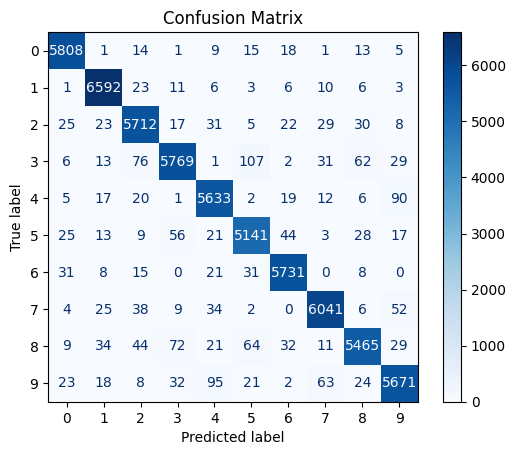

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
cm_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Despite being trained on only 15% of the dataset, our model achieves over 95% on precision, recall and f1 scores. It also demonstrates a high accuracy of 97% overall. The model is reliable and effective but there is still room to improve if we have enough time to fit our model on 70% of the dataset, leaving the other 30% to the test set.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5885
           1       0.98      0.99      0.98      6661
           2       0.96      0.97      0.96      5902
           3       0.97      0.95      0.96      6096
           4       0.96      0.97      0.96      5805
           5       0.95      0.96      0.96      5357
           6       0.98      0.98      0.98      5845
           7       0.97      0.97      0.97      6211
           8       0.97      0.95      0.96      5781
           9       0.96      0.95      0.96      5957

    accuracy                           0.97     59500
   macro avg       0.97      0.97      0.97     59500
weighted avg       0.97      0.97      0.97     59500



In [ ]:
# Gathering the minimum and maximum accuracy scores for the models
cross_val_scores = [
    ["Baseline SVC", cv_score_min, cv_score_max],
    ["RandomizedSearchCV n_iter=3", min(results1.cv_results_['mean_test_score']), max(results1.cv_results_['mean_test_score'])],
    ["RandomizedSearchCV n_iter=10", min(results2.cv_results_['mean_test_score']), max(results2.cv_results_['mean_test_score'])],
    ["RandomizedSearchCV n_iter=15", min(results3.cv_results_['mean_test_score']), max(results3.cv_results_['mean_test_score'])],
    ["GridSearchCV", min(grid_results.cv_results_['mean_test_score']), max(grid_results.cv_results_['mean_test_score'])]
]

# Putting those values in a table form
data_scores = []
for name, min_score, max_score in cross_val_scores:
    data_scores.append({
        "Test": name,
        "Min Accuracy": round(min_score, 4),
        "Max Accuracy": round(max_score, 4)
    })

df_scores = pd.DataFrame(data_scores)

# Displaying the table
pd.set_option("display.max_colwidth", None)
pd.set_option("display.width", 1000)

print(tabulate(df_scores, headers="keys", tablefmt="pretty", showindex=False))

+------------------------------+--------------+--------------+
|             Test             | Min Accuracy | Max Accuracy |
+------------------------------+--------------+--------------+
|         Baseline SVC         |    0.951     |    0.9676    |
| RandomizedSearchCV n_iter=3  |    0.1158    |    0.9497    |
| RandomizedSearchCV n_iter=10 |    0.1158    |    0.9641    |
| RandomizedSearchCV n_iter=15 |    0.1158    |    0.9641    |
|         GridSearchCV         |    0.1158    |    0.9641    |
+------------------------------+--------------+--------------+


# The Importance of CV and Hyperparameter Optimization

Cross validation helps us avoid overfitting by testing the model on multiple subsets (folds) of our original data. By training on various parts of the data, we can increase the performance of our model in terms of accuracy. This process helps us choose the best model hyperparameters, ensuring it performs in a consistent way on all the data. It is an essential process to develop ML models that are accurate and consistent that generalize the best. Hyperparameter optimization minimizes bias and variance, aiming to fine tune the model to the best way.

#Next Steps
We can train the dataset on a larger portion of the data

Our minimum accuracies for the Cross-Validated models are very low. We can investigate the cause of it.

We can train several other ML models and evaluate them.

We can also train neural networks (such as CNN) and evaluate them.

We can split the test and training set with a stratified method to make it more balanced for each label we have.